### Lab Assignment 8: Analyzing Customer Churn in a Telecommunications Company

The dataset contains information about customers of a
telecommunicationscompany and whether they have churned (i.e., discontinued their
services). The dataset includes various attributes of the customers, such as their
demographics, usage patterns, and account information. The goal is to perform data
cleaning and preparation to gain insights into the factors that contribute to customer
churn.

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
print(df.shape, "\n\nColumns:", df.columns.tolist(), "\n")
print(df.dtypes, "\n")
print(df.isna().sum().head(10), "\n")
print(df.nunique().head(10), "\n")

(7043, 38) 

Columns: ['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'] 

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code      

In [7]:
num = df.select_dtypes(include=np.number).columns
cat = df.select_dtypes(exclude=np.number).columns
df[num] = df[num].apply(lambda s: s.fillna(s.median()))
df[cat] = df[cat].apply(lambda s: s.fillna(s.mode().iloc[0]) if not s.mode().empty else s.fillna('Unknown'))

In [9]:
print("Length of dataset before removing duplicates: ", len(df))
df = df.drop_duplicates().reset_index(drop=True)
print("Length of dataset after removing duplicates: ", len(df))

Length of dataset before removing duplicates:  7043
Length of dataset after removing duplicates:  7043


In [11]:
for c in df.select_dtypes('object'):
    df[c] = (df[c].astype(str).str.strip()
                    .str.replace(r'\s+', ' ', regex=True)
                    .str.replace('^yes$', 'Yes', case=False, regex=True)
                    .str.replace('^no$', 'No', case=False, regex=True))

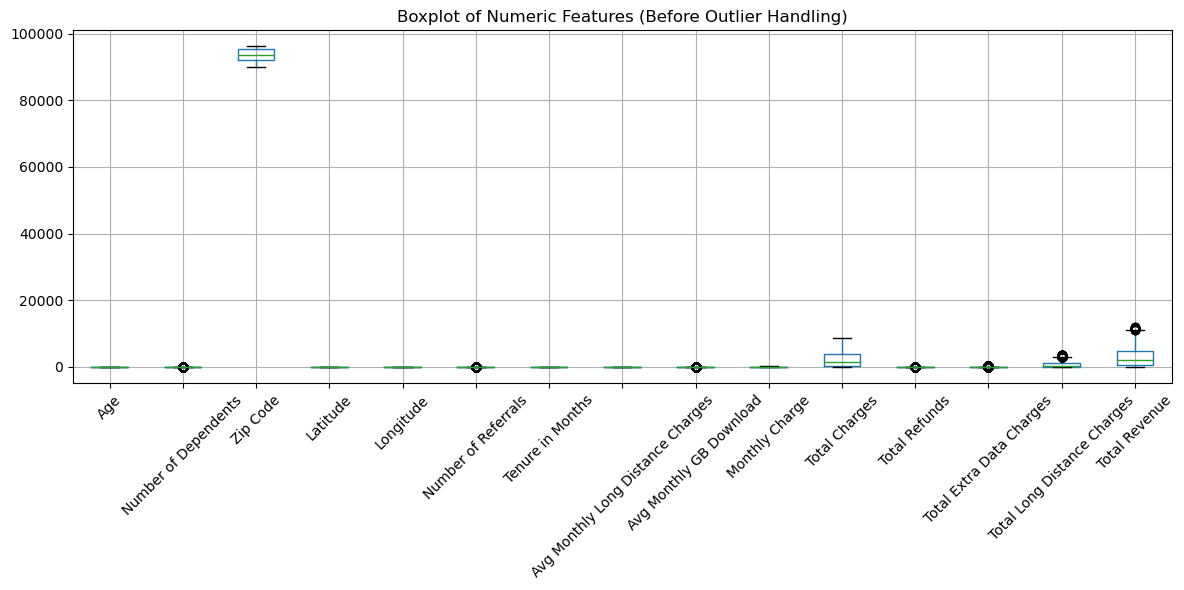

In [13]:
# Boxplot for all numeric columns before removing/clipping outliers
plt.figure(figsize=(12, 6))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot of Numeric Features (Before Outlier Handling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

for c in df.select_dtypes(include=np.number):
    q1, q3 = df[c].quantile([0.25,0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    df[c] = df[c].clip(lo, hi)

In [15]:
from sklearn.preprocessing import LabelEncoder

for c in ['Customer Status','Churn Category','Churn Reason','Payment Method']:
    if c in df.columns:
        le = LabelEncoder()
        df[c] = le.fit_transform(df[c])

In [17]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Customer Status','Churn Category', 'Churn Reason'], errors='ignore')
y = df['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train.shape

(5634, 35)

In [23]:
y_train.shape

(5634,)

In [25]:
X_test.shape

(1409, 35)

In [27]:
y_test.shape

(1409,)

In [29]:
# Export the cleaned dataset to a CSV file
df.to_csv("Cleaned_Telecom_Customer_Churn.csv", index=False)